In [3]:
import os
import sys
utils_script_path = "../KWS_ProtoType/"
Libs_script_path = "../Libs/"
sys.path.append(os.path.abspath(utils_script_path))
sys.path.append(os.path.abspath(Libs_script_path))
from utils import get_recursive_files
import numpy as np
import librosa
import matplotlib.pyplot as plt

/Users/xrickliao/.pyenv/versions/3.7.4/envs/tf15/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Users/xrickliao/.pyenv/versions/3.7.4/envs/tf15/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [42]:
def get_mel_fb(SR=16000, num_fft=1024, num_mels=13, F_Min=100, F_Max=4000):
    mel_fb = librosa.filters.mel(sr=SR, n_fft=num_fft, n_mels=num_mels, fmin=F_Min, 
                                 fmax=F_Max, norm=None)
    ret_fb = mel_fb.T
    print(ret_fb.shape)
    return ret_fb


def get_mfcc_librosa(wav_sig=None, sample_rate=16000, frame_length=400, step_length=160,
                     num_mels=13, num_mfccs=40, mel_fb=None, dct_type=2, window='hamming'):
    tmp_melspec = librosa.feature.melspectrogram(y=wav_sig, sr=sample_rate,
                                                 S=mel_fb,
                                                 n_mels=num_mels,
                                                 n_fft=1024,
                                                 hop_length=step_length,
                                                 win_length=frame_length,
                                                 window=window)

    tmp_melspec = librosa.power_to_db(tmp_melspec)
    _mfcc = librosa.feature.mfcc(S=tmp_melspec, dct_type=dct_type, n_mfcc=num_mfccs, 
                                 norm=None, lifter=0)
    return _mfcc

In [43]:
def draw_FBank(filter_bank):
    plt.figure(figsize=(20,10))
    plt.plot(np.transpose(filter_bank))

In [44]:
def run_main():
    fb = get_mel_fb()
    print(fb.shape)
    draw_FBank(fb.T)

(513, 13)
(513, 13)


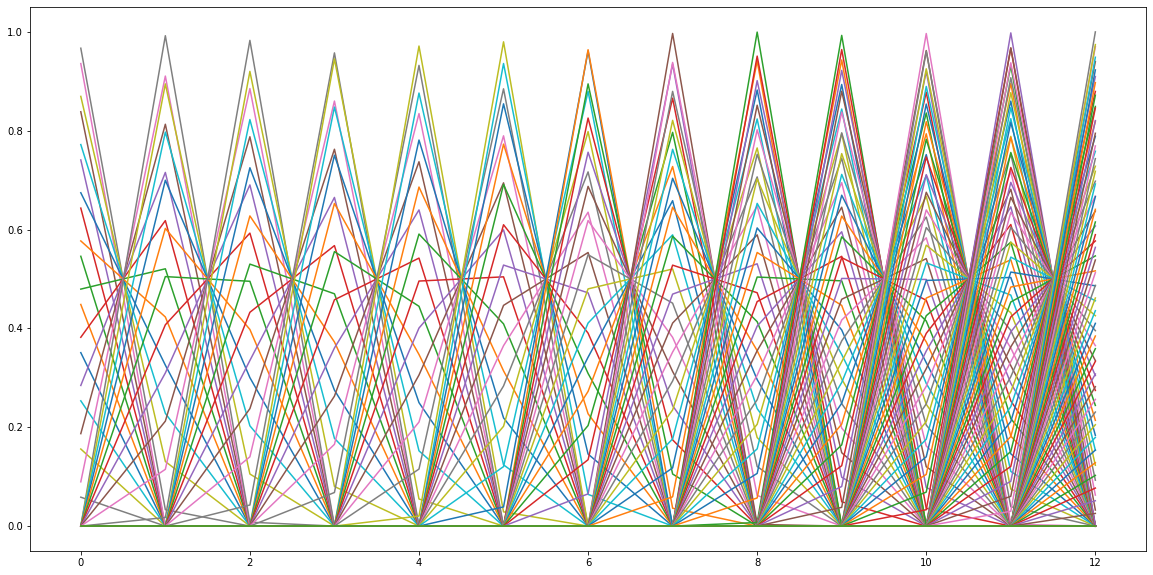

In [45]:
if __name__ == "__main__":
    run_main()